In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to toggle the Python source code visibility
# HTML('''<script>
# code_show=true;
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

In [3]:
## Adding a button to toggle the presentation queue visibility
# HTML('''<script>
# queue_show=true;
# function queue_toggle() {
#  if (queue_show){
#  $('div.queue').hide();
#  } else {
#  $('div.queue').show();
#  }
# queue_show = !queue_show
# } 
# $( document ).ready(queue_toggle);
# </script>
# <form action="javascript:queue_toggle()"><input type="submit" value="Click here to toggle on/off the queues."></form>''')
HTML('''
<button id="toggleButton" onclick="toggleQueue()">Toggle Queue</button>

<script>
  var queueHidden = false;

  function toggleQueue() {
    var queueElements = document.querySelectorAll('div.queue');

    for (var i = 0; i < queueElements.length; i++) {
      if (queueHidden) {
        queueElements[i].style.display = 'block';
      } else {
        queueElements[i].style.display = 'none';
      }
    }

    queueHidden = !queueHidden;
  }
</script>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Syllabus

1. **Probabilities and interpretations**
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 1

## Topics

**[1.1 Probabilities and Interpretation](#1.1-Probabilities-and-Interpretation)**
- 1.1.1 Statistics and probabilities
- **Case study**: Cancer research breakthrough

**[1.2 Basics of presentation of data](#1.2-Basics-of-presentation-of-data)**
- ~~1.2.1 Data presentation~~ *(non-examinable content)*
- 1.2.2 Measures of central tendency
    - Arithmetic mean
    - Geometric mean
    - Harmonic mean
    - Root mean square
    - Median
    - Mode
- 1.2.3 Measures of dispersion
    - Variance and standard deviation
    - Mean absolute deviation
- 1.2.4 Other indicators
    - Skewness
    - Kurtosis
- 1.2.5 Multiple variables
    - Covariance
    - Correlation
    - Covariance matrix
- **Case study**: Correlation does not imply causation

<div class="queue">
    Lecture 1 - 00:00    --    Cover syllabus and general admin stuff first
</div>

## 1.1 Probabilities and Interpretation

### 1.1.1 Statistics and probabilities


#### Context

*Statistics is a tool*. [Barlow]

Statistics and data analysis form the building blocks of **data science**.

<div class="queue">
    Lecture 1 - 00:10
</div>

### Case study: Cancer research breakthrough

New interesting development for the detection of cancer.


<table>
<tr>
    <td>BBC Report</td>
    <td>Article in Science</td>
</tr>
<tr>
    <td width="40%" style="vertical-align: top"><img src="images/cancerBBC.screen.png"></td>
    <td width="40%" style="vertical-align: top"><img src="images/cancerScience.screen.png"> <br><br> <div style="text-align: center">BBC QR Code</div><img src="images/cancerBBC.qrcode.png"> <br><br><br> <div style="text-align: center">Science QR Code</div><img src="images/cancerScience.qrcode.png"></td>
</tr>
<tr>
    <td>Source: <a href="http://www.bbc.co.uk/news/health-42736764">BBC</a></td>
    <td>Source: <a href="http://science.sciencemag.org/content/early/2018/01/17/science.aar3247">Science</a></td>
</tr>
</table>

Great development for cancer research

Need some caution:
1. News: 70% success rate is the median success rate of the study. Article: success rate for Stage I, Stage II and Stage III cancers are 43%, 73% and 78%, respectively.
2. Article (abstract): specificity (i.e. 1-false positive rate) of the test is 99.14%.

The latter implies that a healthy (non-cancerous) adult tested for most of their adult life (40 years) would have a 29% chance of being tested positive. How did we get this?

> We want to calculate the chance of not getting a false positive in 40 years.

> The chance of not being controlled as false positive in one year is $0.9914$. This means that the chance of not being controlled as false positive after 40 years is the product of the probabilities for each year: $0.9914^{40}$.

> Finally, the chance of getting a false positive after 40 years is $1 - 0.9914^{40} = 0.29$.

This might cause issues if entire population is tested every year...

<div class="queue">
    Lecture 1 - 00:15
</div>

## 1.2 Basics of presentation of data

### 1.2.1 Data presentation

#### Description of data

Two types of data:
- Qualitative / non-numeric: e.g. food preference
- Quantitative / numeric: e.g. length of an object

Quantitative data divided into two subtypes:
- Discrete: e.g. number of photons detected
- Continuous: e.g. mass of galaxies

<div class="queue">
    Lecture 1 - 00:20
</div>

### 1.2.2 Measures of central tendency

Useful to describe a dataset/distribution with a single number.

We define a dataset containing N elements as:

\begin{equation}
  S = \{x_1, x_2, x_3,...,x_N\}
\end{equation}

Example dataset
x = {4, 1, 3, 9, 5, 4, 4, 6, 2, 4, 7, 7, 4, 3, 2}

Binned data:
value:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9
weight: 0, 1, 2, 2, 5, 1, 1, 2, 0, 1


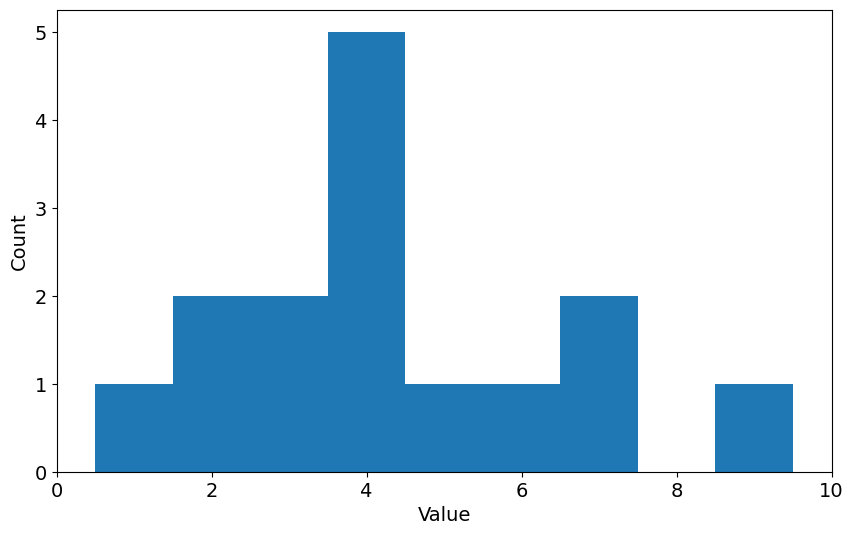

In [4]:
## Define a set of data
#x = np.random.poisson(4, size=15)
x = np.array([4, 1, 3, 9, 5, 4, 4, 6, 2, 4, 7, 7, 4, 3, 2])
print('Example dataset')
print('x = {' + ', '.join(['{}'.format(xi) for xi in x]) + '}')

fig,ax = plt.subplots(figsize=[10,6])
weights, bins, patches = ax.hist(x, range=[0,10], bins=10, align='left')
weights = weights.astype(int)
bins = bins[:-1].astype(int)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_xlim([0,10]);

print('')
print('Binned data:')
print('value:  ' + ', '.join(['{}'.format(b) for b in bins]))
print('weight: ' + ', '.join(['{}'.format(w) for w in weights]))

#### Arithmetic mean
Also called mean or average:
\begin{equation}
    \langle x \rangle = \frac{1}{N} \sum_{i=1}^{N} x_i
\end{equation}

#### Geometric mean
Average side length of hyper-volume
\begin{equation}
    {\rm GM} = \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}}
\end{equation}

Also referred to log-average:
\begin{equation}
  {\rm GM} = \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}} = \exp \left[ \frac{1}{N} \sum_{i=1}^{N} \ln x_i \right]
\end{equation}

_**Note:**_ More numerically stable.

#### Harmonic mean
\begin{equation}
    H = \frac{N}{\sum_{i=1}^{N} \frac{1}{x_i}}
\end{equation}

Harmonic mean, H, is a Schur-concave function:
\begin{equation}
  \min(x_1,...,x_N) \leq H \leq N \min(x_1,...,x_N) .
\end{equation}

#### Root mean square
\begin{equation}
    {\rm RMS} = \sqrt{\frac{\sum_{i=1}^{N} x_i^2}{N}}
\end{equation}

#### Median
Middle point with equal probability on both sides.

Discrete dataset, order elements in increasing value and
- If odd number of elements: the median is the middle element.
- If even number of elements: the median is defined as the average of the two middle elements.

Continuous distribution, the median is where the probability below is equal to that above.

#### Mode
Most likely value
    - Discrete distributions: most common value
    - Continuous distributions: maximum of the probability distribution function

#### Binned/weighted data and continuous distributions

For binned/weighted data, we must account for the number of points in each bin (e.g. 'weight')
\begin{equation}
  \langle x \rangle = \frac{ \sum_{j=1}^{J} n_j x_j }{ \sum_{j=1}^{J} n_j }
\end{equation}

For discrete data this is a sum; for continuous data the sums become integrals
\begin{equation}
  \langle x \rangle = \frac{ \int_{x_{\rm min}}^{x_{\rm max}} n(x) x {\rm d}x }{ \int_{x_{\rm min}}^{x_{\rm max}} n(x) {\rm d}x }
\end{equation}

Below is a comparison of the arithmetic mean, median and mode for two distributions having the same median.

<img src="images/Comparison_mean_median_mode.svg" width="50%">

(Source: [Cmglee](https://commons.wikimedia.org/wiki/User:Cmglee), [Comparison mean median mode](https://commons.wikimedia.org/wiki/File:Comparison_mean_median_mode.svg), [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/legalcode))

<div class="queue">
    Lecture 1 - 00:35
</div>

### 1.2.3 Measures of dispersion

Characterises the spread of a dataset/distribution with a single number.

#### Variance and standard deviation

*Population variance* and *population standard deviation*:

\begin{equation}
  V(x) = \sigma^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 \,,
\end{equation}

where $\mu$ is the mean of the population (i.e. the true mean).

*Sample variance* and *sample standard distribution* uses the mean from the samples instead, \langle x \rangle:

\begin{equation}
  s^2_{\rm uncorr} = \frac{1}{N} \sum_{i=1}^N (x_i - \langle x \rangle)^2 \,.
\end{equation}

For small dataset, this is biased. Normalise by a factor $N-1$ instead of $N$:

\begin{equation}
  s^2_{\rm corr} = \frac{1}{N-1} \sum_{i=1}^N (x_i - \langle x \rangle)^2 \,.
\end{equation}

Definition with $N-1$ factor: **corrected/unbiased sample variance**

Definition with $N$ factor: **uncorrected/biased sample variance**

#### Mean absolute deviation

\begin{equation}
  {\rm MAD} = \frac{1}{N} \sum_{i=1}^N \left| x_i - \langle x \rangle \right|
\end{equation}

More robust to outliers.

<div class="queue">
    Lecture 2 - 00:00
</div>

### 1.2.4 Other indicators

#### Skewness

Measures the asymmetry.

\begin{equation}
  \gamma = \frac{1}{\sigma^3} \langle \left(x_i - \langle x \rangle \right)^3 \rangle = \frac{1}{N \sigma^3} \sum_{i=1}^N (x_i - \langle x \rangle)^3
\end{equation}

Negative implies longer tail to the left. Positive implies the opposite behaviour.

<img src="images/Negative_and_positive_skew_diagrams_(English).svg" width="75%">

(Source: [Rodolfo Hermans (Godot)](https://en.wikipedia.org/wiki/User:Rodolfo_Hermans), [Negative and positive skew diagrams (English)](https://commons.wikimedia.org/wiki/File:Negative_and_positive_skew_diagrams_%28English%29.svg), [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/legalcode))

#### Kurtosis

The *kurtosis* measures 'boxiness':

\begin{equation}
  \kappa = \frac{1}{\sigma^4} \langle \left(x_i - \langle x \rangle \right)^4 \rangle - 3 = \frac{1}{N \sigma^4} \sum_{i=1}^N (x_i - \langle x \rangle)^4 - 3
\end{equation}

Positive kurtosis implies more concentrated around the mean. Negative kurtosis implies more spread in the tails.

<img src="images/Standard_symmetric_pdfs.png" width="50%">

(Source: [MarkSweep](https://commons.wikimedia.org/wiki/User:MarkSweep), [Standard symmetric pdfs](https://commons.wikimedia.org/wiki/File:Standard_symmetric_pdfs.png), [Wikimedia Commons](https://commons.wikimedia.org/wiki/Template:PD-self))

<div class="queue">
    Lecture 2 - 00:10
</div>

### 1.2.5 Multiple variables

A dataset can contain multiple variables:

\begin{equation}
  S = \{(x_1, y_1, z_1), (x_2, y_2, z_2), (x_3, y_3, z_3), \dots , (x_N, y_N, z_N)\}
\end{equation}

#### Covariance

Measure of joint variability of two random variables.Extension of variance.

\begin{equation}
  \operatorname{cov}(x,y) = \frac{1}{N} \sum_{i=1}^N (x_i - \langle x \rangle)(y_i - \langle y \rangle)
\end{equation}

_**Note: Population vs sample covariance. Also, uncorrected/biased ($1/N$) or the corrected/unbiased ($1/(N-1)$) pre-factor.**_

#### Correlation

Covariance has dimensions $[x][y]$. *Correlation* is dimensionless and sometimes more practical:

\begin{equation}
  \rho = \frac{\operatorname{cov}(x,y)}{\sigma_x \sigma_y}
\end{equation}

Value between -1 and +1.

_**Note: Consistent use of covariance and standard deviation (i.e. 'population' or 'sample'). Pre-factor (corrected or uncorrected) cancels out.**_

1. The correlation is not affected by the mean value of data points (i.e. it is translation invariant).
2. The correlation reflects the coupling between the two quantities, but is independent of the slope due to the normalisation by the standard deviations (i.e. it is scale invariant). (Note the the middle figure has an undefined correlation due to $\sigma_y = 0$.)
3. The correlation does not capture nonlinear coupling between the parameters.

<img src="images/1024px-Correlation_examples2.svg.png" width="75%">

(Source: [DenisBoigelot](https://commons.wikimedia.org/wiki/User:DenisBoigelot), [Correlation examples2](https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg), [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/legalcode))

#### Covariance matrix

Handy way to represent combination of covariance in multiple dimensions.

\begin{equation}
  \Sigma = 
  \begin{bmatrix}
    \operatorname{cov}(X_1,X_1) & \operatorname{cov}(X_1,X_2) & \operatorname{cov}(X_1,X_3) & \dots  & \operatorname{cov}(X_1,X_n) \\
    \operatorname{cov}(X_2,X_1) & \operatorname{cov}(X_2,X_2) & \operatorname{cov}(X_2,X_3) & \dots  & \operatorname{cov}(X_2,X_n) \\
    \vdots       & \vdots & \vdots & \ddots & \vdots \\
    \operatorname{cov}(X_n,X_1) & \operatorname{cov}(X_n,X_2) & \operatorname{cov}(X_n,X_3) & \dots  & \operatorname{cov}(X_n,X_n)
  \end{bmatrix}
\end{equation}

Always symmetric and positive-semidefinite.

<div class="queue">
    Lecture 2 - 00:30
</div>

### Case study: Correlation does not imply causation

```
In statistics, many statistical tests calculate correlations between variables and when two variables are found to be correlated, it is tempting to assume that this shows that one variable causes the other.
```
<div style="text-align: right">(Source: <a href="https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation">Wikipedia</a>)</div>



#### The ice cream and drowning classic

*As ice cream sales increase, the rate of drowning deaths increases sharply.*

*Therefore, ice cream consumption causes drowning.*

<img src="images/Ice_Cream_and_Drowning_nolabels.png" width="75%">

Of course, eating ice cream does not causes a higher risk of drowning. The example fails to recognise that more people are exposed to water-related activities in the hot summer months when they are also likely to eat ice cream. Here, the _two variables are correlated because they share a common cause_.

The figure below provides crucial information about the hidden underlying link.

<img src="images/Ice_Cream_and_Drowning_labels.png" width="75%">

<div class="queue">
    Lecture 2 - 00:40
</div>

#### Predicting your course mark

Here are data from the 2018 edition of PHYS 10792 Introduction to Data Science. There is a stricking correlation between the overall grade and the coursework grade.

<img src="images/Assign_Exam.png" width="50%">

Is there a causation between these two quantities? One could claim that this has to do with how 'good' your are academically. However...

<img src="images/Grade_Missed.png" width="50%">

The figure above shows a clear link between the overall grade and the number of missed assignments. It appears that how much you engage with the course has a strong influence on how well you do. This is a very important distinction as it has nothing to do, at least to first order, with your 'academic proficiency'.

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>